# Task 2
# MOVIE RATING PREDICTION WITH PYTHON
 I can help you with that. Here's a sample code to get you started with building a movie rating prediction model in Python:

In [2]:
#Step no.1 - Upload Data
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.xlsx to IMDb Movies India.xlsx


In [3]:
#Step no.2 - Import Libraries & Load the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import io
stock = pd.read_excel('IMDb Movies India.xlsx')

In [4]:
stock

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Step no.3 - Data Preprocessing
stock.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,-2021.0,90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,-2010.0,105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,-2008.0,59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
stock.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,-1995.0,NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,-1993.0,NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,-1992.0,NaN,"Action, Crime, Drama",5.3,135.0,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,-1979.0,NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,-1988.0,NaN,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,-2005.0,NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,-1988.0,NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
stock.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [8]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  float64
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   float64
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.2+ MB


In [9]:
stock.shape

(15509, 10)

In [10]:
stock.describe()

,Year,Rating,Votes
count,14981.000000,7919.000000,7920.000000
mean,-1987.012215,5.841621,1938.276283
std,25.416689,1.381777,11601.703700
min,-2022.000000,1.100000,5.000000
25%,-2009.000000,4.900000,16.000000
50%,-1991.000000,6.000000,55.000000
75%,-1968.000000,6.800000,404.000000
max,-1913.000000,10.000000,591417.000000


In [11]:
stock.isnull()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15504,False,False,True,False,False,False,False,False,False,False
15505,False,False,False,False,False,False,False,False,False,False
15506,False,False,True,False,True,True,False,False,True,True
15507,False,False,True,False,True,True,True,True,True,True


In [12]:
stock.isnull().values.any()

True

In [13]:
stock.dropna(axis= 0, inplace= True)

In [14]:
stock.head(8)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani


In [15]:
stock.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15482,Zindagi Zindabad,-2000.0,140 min,Drama,5.7,7.0,Sumitra Bhave,Sunil Sukthankar,Mita Vashisht,Milind Gunaji
15487,Zokkomon,-2011.0,109 min,"Action, Adventure, Family",4.0,351.0,Satyajit Bhatkal,Darsheel Safary,Anupam Kher,Manjari Fadnnis
15488,Zoo,-2018.0,100 min,Drama,5.7,78.0,Shlok Sharma,Shashank Arora,Prince Daniel,Shatakshi Gupta
15490,Zor: Never Underestimate the Force,-1998.0,157 min,"Action, Drama, Thriller",4.3,268.0,Sangeeth Sivan,Sunny Deol,Sushmita Sen,Milind Gunaji
15492,Zorro,-1975.0,150 min,"Action, Adventure, Comedy",5.6,33.0,Shibu Mitra,Navin Nischol,Rekha,Urmila Bhatt
15493,Zubaan,-2015.0,115 min,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496.0,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [16]:
stock.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [17]:
newdata = stock.drop_duplicates()

In [18]:
newdata

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,-2015.0,115 min,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496.0,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [19]:
newdata.dtypes

Name         object
Year        float64
Duration     object
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [22]:
newdata['Votes'] = newdata['Votes'].replace('[^\d.]', '', regex=True).astype(float)
newdata['Year'] = newdata['Year'].replace('[^\d.]', '', regex=True).astype('Int64')
newdata['Duration'] = newdata['Duration'].replace('[^\d.]', '', regex=True).astype(float)
newdata.dtypes

Name         object
Year          Int64
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [23]:
stock.describe

<bound method NDFrame.describe of                                      Name    Year Duration  \
1      #Gadhvi (He thought he was Gandhi) -2019.0  109 min   
3                                 #Yaaram -2019.0  110 min   
5                    ...Aur Pyaar Ho Gaya -1997.0  147 min   
6                               ...Yahaan -2005.0  142 min   
8                      ?: A Question Mark -2012.0   82 min   
...                                   ...     ...      ...   
15493                              Zubaan -2015.0  115 min   
15494                            Zubeidaa -2001.0  153 min   
15503                     Zulm Ki Zanjeer -1989.0  125 min   
15505                               Zulmi -1999.0  129 min   
15508                        Zulm-O-Sitam -1998.0  130 min   

                           Genre  Rating   Votes         Director  \
1                          Drama     7.0     8.0    Gaurav Bakshi   
3                Comedy, Romance     4.4    35.0       Ovais Khan   
5         Come

In [24]:
stock.head(8)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),-2019.0,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,-2019.0,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,-1997.0,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,-2005.0,142 min,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,-2012.0,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,-2014.0,116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,-2004.0,96 min,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,-2016.0,120 min,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani


In [25]:
stock.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15493,Zubaan,-2015.0,115 min,Drama,6.1,408.0,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,-2001.0,153 min,"Biography, Drama, History",6.2,1496.0,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,-1989.0,125 min,"Action, Crime, Drama",5.8,44.0,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,-1999.0,129 min,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15508,Zulm-O-Sitam,-1998.0,130 min,"Action, Drama",6.2,20.0,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [26]:
newdata.info

<bound method DataFrame.info of                                      Name   Year  Duration  \
1      #Gadhvi (He thought he was Gandhi)  -2019     109.0   
3                                 #Yaaram  -2019     110.0   
5                    ...Aur Pyaar Ho Gaya  -1997     147.0   
6                               ...Yahaan  -2005     142.0   
8                      ?: A Question Mark  -2012      82.0   
...                                   ...    ...       ...   
15493                              Zubaan  -2015     115.0   
15494                            Zubeidaa  -2001     153.0   
15503                     Zulm Ki Zanjeer  -1989     125.0   
15505                               Zulmi  -1999     129.0   
15508                        Zulm-O-Sitam  -1998     130.0   

                           Genre  Rating   Votes         Director  \
1                          Drama     7.0     8.0    Gaurav Bakshi   
3                Comedy, Romance     4.4    35.0       Ovais Khan   
5         Comedy

In [27]:
newdata.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [31]:
newdata.drop(['Name','Genre','Director','Actor 1','Actor 2','Actor 3'], axis = 1, inplace = True)

In [32]:
newdata.head(7)

,Year,Duration,Rating,Votes
1,-2019,109.0,7.0,8.0
3,-2019,110.0,4.4,35.0
5,-1997,147.0,4.7,827.0
6,-2005,142.0,7.4,1086.0
8,-2012,82.0,5.6,326.0
9,-2014,116.0,4.0,11.0
10,-2004,96.0,6.2,17.0


In [33]:
newdata.tail(6)

,Year,Duration,Rating,Votes
15492,-1975,150.0,5.6,33.0
15493,-2015,115.0,6.1,408.0
15494,-2001,153.0,6.2,1496.0
15503,-1989,125.0,5.8,44.0
15505,-1999,129.0,4.5,655.0
15508,-1998,130.0,6.2,20.0


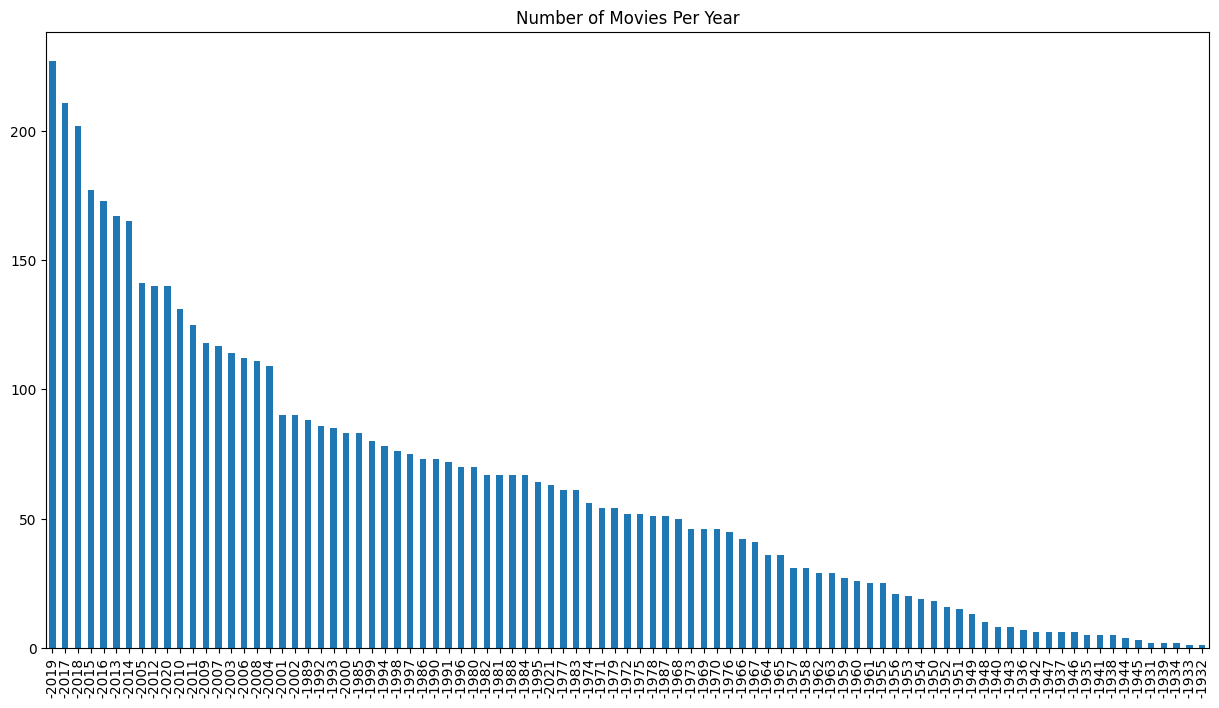

In [44]:
plt.figure(figsize=(15,8))
newdata['Year'].value_counts().plot(kind='bar')
plt.title('Number of Movies Per Year')
plt.show()

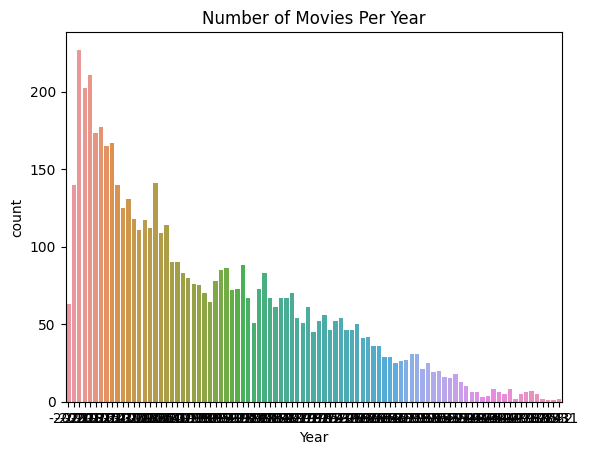

In [46]:
import seaborn as sns
sns.countplot(x = "Year", data = newdata)
plt.title("Number of Movies Per Year")
plt.show()

In [34]:
#Step no.4 - Train and Test Split
X = newdata.drop(['Rating'], axis=1)
y = newdata['Rating']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:" ,X_test.shape)
print("Shape of y_test:" ,y_test.shape)

Shape of X_train: (4527, 3)
Shape of y_train: (4527,)
Shape of X_test: (1132, 3)
Shape of y_test: (1132,)


In [48]:
#Step no.5 - Build and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.3066487776555733


In [40]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[5.80502417 5.75971063 5.9313535  ... 5.71765087 5.60413126 6.52075924]
(1132,)


In [42]:
#Data from Users
userdata = pd.DataFrame({
    'Year': [2023],
    'Duration': [222],
    'Votes': [23445],
})


predicted_rating = model.predict(new_input)

print("Predicted Rating:", predicted_rating)

Predicted Rating: [80.89748483]


Python provides several libraries to assist with these steps, such as pandas for data manipulation, scikit-learn for machine learning algorithms, and matplotlib for visualizations.
By following this step-by-step process, you can develop a movie rating prediction model and use it to predict the ratings of unseen movies.